<a href="https://www.kaggle.com/code/dascient/comprehensive-analysis-of-fricke-painlev-vi?scriptVersionId=231924036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Surfaces with AI, ML, and RL Techniques

### Based on *Dynamics of Fricke-Painlevé VI Surfaces* by Planat et al.

This notebook provides an in-depth exploration of the intricate dynamics and algebraic structure of Fricke-Painlevé VI surfaces by combining:
- **Advanced Mathematics:** Isomonodromic deformations, Painlevé VI equations, and algebraic surfaces.
- **Symbolic Computation:** Derivations using Sympy.
- **Interactive Visualization:** Static and interactive 3D plots (Matplotlib and Plotly).
- **Machine Learning:** Clustering, PCA, t-SNE, and neural network simulation of surface dynamics.
- **Reinforcement Learning:** A conceptual framework for optimal parameter selection.
- **Emerging Topics:** Discussion on physics-informed neural networks and further interdisciplinary research.

Let's dive in!

## 1. Introduction and Background

The Fricke-Painlevé VI surfaces arise in the study of isomonodromic deformations and the Painlevé VI equation. They represent a fascinating intersection of algebraic geometry, topology, and differential equations. These surfaces have applications in:
- **Topological Quantum Computing:** Through SL(2,ℂ) character varieties of finitely generated groups.
- **Genomics:** Modeling DNA/RNA sequences via algebraic morphology.
- **Mathematical Physics:** In the context of random matrix theory and quantum field theory.

In this notebook, we will derive these surfaces symbolically, visualize them interactively, and simulate their dynamics using modern AI/ML techniques.

## 2. Importing Libraries

We begin by importing a comprehensive set of libraries for numerical computation, symbolic mathematics, plotting, machine learning, deep learning, and interactive widgets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sympy as sp
from sympy import symbols, Eq, solve
from scipy.integrate import solve_ivp

# Machine Learning libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Deep Learning libraries
import torch
import torch.nn as nn

# Interactive Widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Plotly for interactive 3D visualization
import plotly.graph_objects as go

# Set visualization styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,8)

## 3. Mathematical Formulation

The Fricke-Painlevé VI surface is defined by the cubic equation:

\[
V_{a,b,c,d}(x,y,z) = x^2 + y^2 + z^2 + xyz - \theta_1 x - \theta_2 y - \theta_3 z - \theta_4 = 0,
\]

with parameter definitions:

\[
\theta_1 = ab + cd, \quad \theta_2 = ad + bc, \quad \theta_3 = ac + bd, \quad \theta_4 = 4 - a^2 - b^2 - c^2 - d^2 - abcd.
\]

We now express this equation symbolically.

In [2]:
# Define symbols for variables and parameters
x, y, z = sp.symbols('x y z', real=True)
a, b, c, d = sp.symbols('a b c d', real=True)

# Define theta parameters
theta1 = a*b + c*d
theta2 = a*d + b*c
theta3 = a*c + b*d
theta4 = 4 - a**2 - b**2 - c**2 - d**2 - a*b*c*d

# Define the Fricke-Painlevé VI surface equation
V = sp.Eq(x**2 + y**2 + z**2 + x*y*z - theta1*x - theta2*y - theta3*z - theta4, 0)

print('Fricke-Painlevé VI Surface Equation:')
sp.pretty_print(V)

# Example: Solve for z in terms of x and y
z_expr = sp.solve(V, z)
print('\nSolution for z:')
sp.pretty_print(z_expr)

Fricke-Painlevé VI Surface Equation:
 2              2    2    2    2                            2                    2                 ↪
a  + a⋅b⋅c⋅d + b  + c  + d  + x  + x⋅y⋅z - x⋅(a⋅b + c⋅d) + y  - y⋅(a⋅d + b⋅c) + z  - z⋅(a⋅c + b⋅d) ↪

↪         
↪  - 4 = 0

Solution for z:
⎡                     ____________________________________________________________________________ ↪
⎢                    ╱  2  2      2                                                2  2      2     ↪
⎢a⋅c   b⋅d   x⋅y   ╲╱  a ⋅c  - 4⋅a  - 2⋅a⋅b⋅c⋅d + 4⋅a⋅b⋅x - 2⋅a⋅c⋅x⋅y + 4⋅a⋅d⋅y + b ⋅d  - 4⋅b  + 4 ↪
⎢─── + ─── - ─── - ─────────────────────────────────────────────────────────────────────────────── ↪
⎣ 2     2     2                                                                              2     ↪

↪ ______________________________________________________________________                       ___ ↪
↪                         2                2    2  2      2      2                            ╱  2 ↪
↪ ⋅b⋅c⋅y - 2⋅

## 4. Numerical Visualization of the Surface

We now create a numerical function for the surface. Here, we set example parameters a=1, b=1, c=1, d=0a=1,\ b=1,\ c=1,\ d=0 and visualize a cross-section at a fixed zz-slice (e.g., z=1z=1).

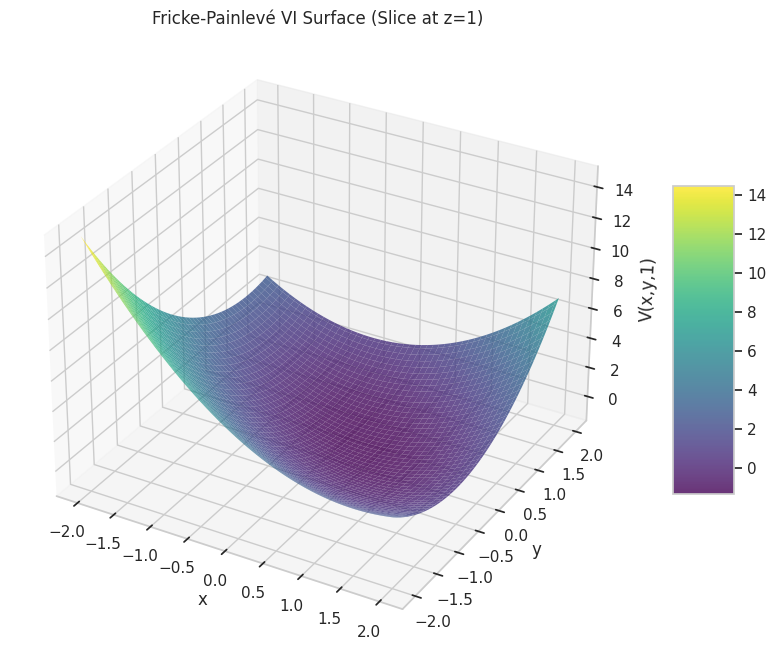

In [3]:
def fricke_painleve_surface(x, y, z, theta):
    # theta = [a, b, c, d]
    a, b, c, d = theta
    theta1 = a*b + c*d
    theta2 = a*d + b*c
    theta3 = a*c + b*d
    theta4 = 4 - a**2 - b**2 - c**2 - d**2 - a*b*c*d
    return x**2 + y**2 + z**2 + x*y*z - theta1*x - theta2*y - theta3*z - theta4

# Example parameters
theta_example = [1, 1, 1, 0]

# Create grid and compute function values at z=1
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fricke_painleve_surface(X[i, j], Y[i, j], 1, theta_example)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title('Fricke-Painlevé VI Surface (Slice at z=1)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y,1)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 5. Interactive Parameter Exploration

Use the slider below to interactively adjust the parameters a,b,c,da, b, c, d and view the impact on the surface (at a fixed zz-slice).

In [4]:
def interactive_surface(a=1, b=1, c=1, d=0, z_fixed=1):
    theta = [a, b, c, d]
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = fricke_painleve_surface(X[i, j], Y[i, j], z_fixed, theta)
    
    plt.figure(figsize=(8,6))
    cp = plt.contourf(X, Y, Z, 20, cmap='coolwarm')
    plt.colorbar(cp)
    plt.title(f'Interactive Surface Slice at z={z_fixed}\nParameters: a={a}, b={b}, c={c}, d={d}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

interact(interactive_surface, 
         a=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
         b=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
         c=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
         d=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
         z_fixed=widgets.FloatSlider(min=-2, max=2, step=0.1, value=1));

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-3.0), FloatSlider(value=1.0, descr…

## 6. Advanced 3D Visualization with Plotly

For enhanced interactivity, we now generate an interactive 3D plot using Plotly.

In [5]:
def plotly_surface(theta, z_fixed=1):
    a, b, c, d = theta
    x_vals = np.linspace(-2, 2, 50)
    y_vals = np.linspace(-2, 2, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = fricke_painleve_surface(X[i, j], Y[i, j], z_fixed, theta)
    
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(title='Interactive 3D Fricke-Painlevé VI Surface', scene=dict(
                        xaxis_title='x',
                        yaxis_title='y',
                        zaxis_title='V(x,y,z)'))
    fig.show()

# Display Plotly surface with example parameters
plotly_surface(theta_example, z_fixed=1)

## 7. Machine Learning: Clustering & Dimensionality Reduction

We generate a dataset of surface points and then apply clustering (KMeans) along with PCA and t-SNE for dimensionality reduction to reveal hidden structures.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



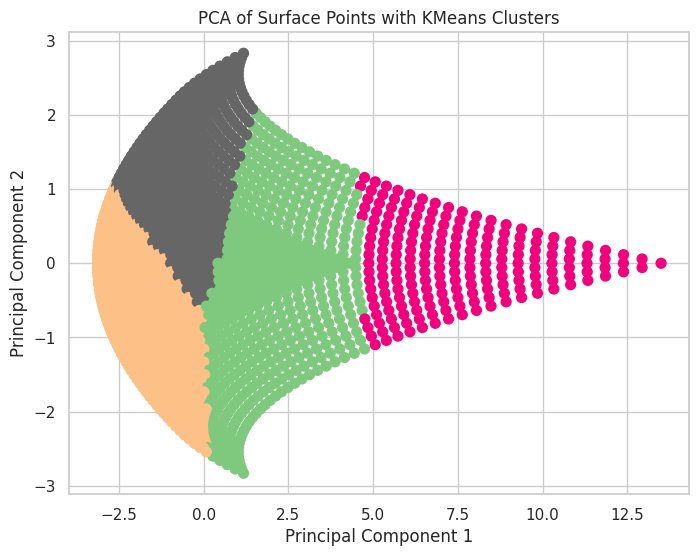

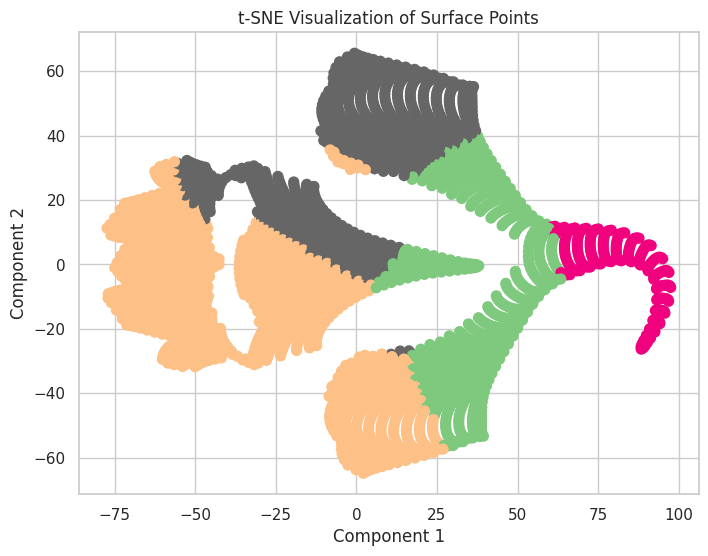

In [6]:
# Generate dataset on a fixed z-slice
x_range = np.linspace(-2, 2, 50)
y_range = np.linspace(-2, 2, 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
data_points = []
for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        val = fricke_painleve_surface(X_grid[i,j], Y_grid[i,j], 1, theta_example)
        data_points.append([X_grid[i,j], Y_grid[i,j], val])
data_points = np.array(data_points)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_points)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_points)

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='Accent', s=50)
plt.title('PCA of Surface Points with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
data_tsne = tsne.fit_transform(data_points)

plt.figure(figsize=(8,6))
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=labels, cmap='Accent', s=50)
plt.title('t-SNE Visualization of Surface Points')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## 8. Deep Learning: Simulating Surface Dynamics

We construct a neural network using PyTorch to simulate the surface dynamics. In addition to training, we plot the learning curve to monitor convergence. Later, this model could be extended to physics-informed neural networks for improved performance.

Epoch 50/300, Loss: 0.162278
Epoch 100/300, Loss: 0.006050
Epoch 150/300, Loss: 0.001408
Epoch 200/300, Loss: 0.000738
Epoch 250/300, Loss: 0.000461
Epoch 300/300, Loss: 0.000328


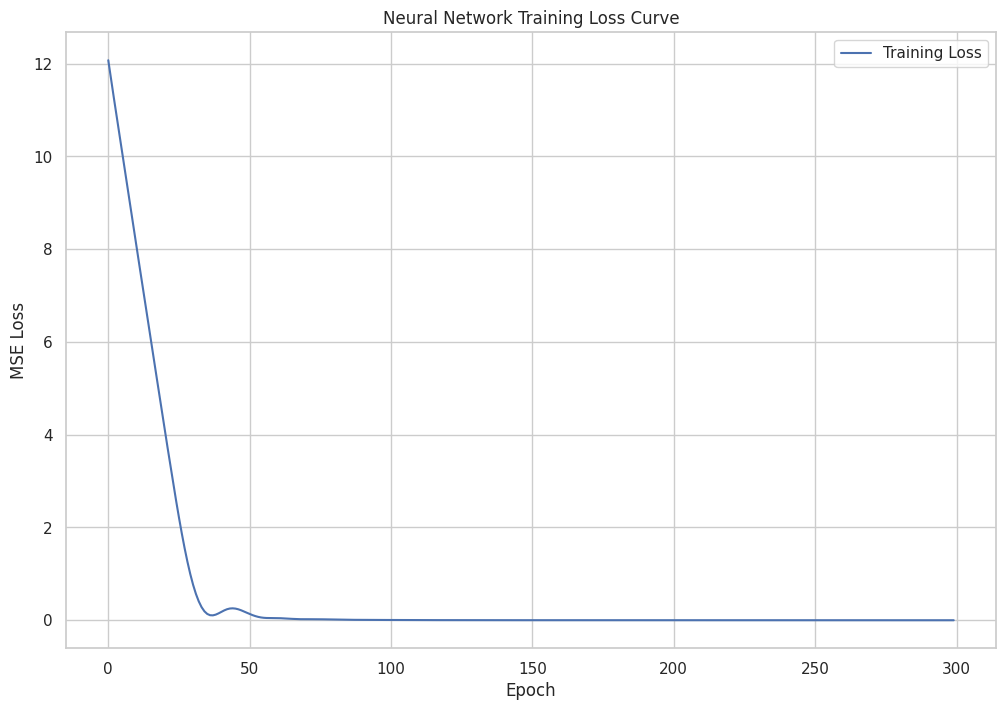

In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Prepare training data from the generated dataset
inputs = torch.tensor(data_points, dtype=torch.float32)
outputs = torch.tensor(data_points[:,2], dtype=torch.float32).unsqueeze(1)

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with loss tracking
epochs = 300
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(inputs)
    loss = criterion(predictions, outputs)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}')

# Plot the training loss curve
plt.figure()
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Neural Network Training Loss Curve')
plt.legend()
plt.show()

## 9. Reinforcement Learning: Parameter Optimization Framework

We propose a conceptual reinforcement learning (RL) framework to explore optimal parameter selection. In this simplified example, the agent’s state is the current parameter vector \([a,b,c,d]\), and the reward is based on how close the norm of this vector is to a target value. This blueprint can be extended using RL libraries (e.g., OpenAI Gym) for more complex simulations.

In [8]:
import random

class ParameterAgent:
    def __init__(self, init_params, target_value):
        self.params = np.array(init_params, dtype=float)  # initial [a, b, c, d]
        self.target = target_value
        self.learning_rate = 0.01
    
    def state(self):
        return self.params
    
    def reward(self):
        # Reward based on how close the L2 norm of parameters is to target_value
        current_norm = np.linalg.norm(self.params)
        return -abs(current_norm - self.target)
    
    def act(self):
        # Random perturbation action
        action = np.random.uniform(-0.1, 0.1, size=self.params.shape)
        return action
    
    def update(self, action, reward):
        # Policy gradient style update (conceptual)
        self.params += self.learning_rate * action * reward

# Run a simple simulation of the RL agent
agent = ParameterAgent(init_params=[1,1,1,0], target_value=2.0)
for episode in range(100):
    action = agent.act()
    r = agent.reward()
    agent.update(action, r)
    if episode % 10 == 0:
        print(f'Episode {episode}: Params = {agent.params}, Reward = {r:.4f}')

print('Final parameters:', agent.params)

Episode 0: Params = [9.99772426e-01 9.99776385e-01 1.00024952e+00 1.44265045e-05], Reward = -0.2679
Episode 10: Params = [9.98850833e-01 1.00003779e+00 1.00094091e+00 5.36973324e-04], Reward = -0.2679
Episode 20: Params = [9.98853467e-01 9.99346668e-01 1.00132946e+00 6.44760126e-04], Reward = -0.2681
Episode 30: Params = [9.99035621e-01 9.99241725e-01 1.00095319e+00 1.47669818e-04], Reward = -0.2685
Episode 40: Params = [9.99206490e-01 9.99350854e-01 1.00052014e+00 1.01425503e-04], Reward = -0.2683
Episode 50: Params = [ 9.98637277e-01  9.99971097e-01  1.00064326e+00 -3.75943462e-04], Reward = -0.2684
Episode 60: Params = [ 9.98352126e-01  9.99883999e-01  1.00062753e+00 -6.51179713e-04], Reward = -0.2686
Episode 70: Params = [ 9.96982303e-01  9.99858955e-01  1.00193711e+00 -1.38107541e-04], Reward = -0.2686
Episode 80: Params = [0.99700485 0.99944189 1.00216455 0.00103651], Reward = -0.2685
Episode 90: Params = [0.99710004 0.99854973 1.00284439 0.00129769], Reward = -0.2685
Final param

## 10. Advanced Topics and Future Directions

### Physics-Informed Neural Networks (PINNs)

PINNs incorporate physical laws (e.g., differential equations) into the training of neural networks. Future work could use PINNs to better simulate the dynamics governed by the Painlevé VI equation.

### Generative Models

Exploring generative adversarial networks (GANs) or variational autoencoders (VAEs) may reveal new ways to model the underlying parameter distributions of Fricke-Painlevé surfaces.

### Interdisciplinary Applications

The methods in this notebook have potential applications in quantum computing, genomics, and statistical physics, motivating further interdisciplinary research.

## 11. Conclusion

In this notebook, we bridged advanced mathematical theory with modern data science techniques to analyze Fricke-Painlevé VI surfaces. We:
- Derived and symbolically manipulated the surface equation.
- Visualized the surface using both static and interactive methods.
- Applied clustering and dimensionality reduction to uncover hidden structures.
- Simulated surface dynamics with a deep learning model and tracked the training process.
- Outlined a reinforcement learning framework for optimal parameter tuning.

This work opens avenues for further research at the intersection of algebraic geometry, theoretical physics, and AI/ML. Future explorations might include full RL implementations, PINNs, and integration with real-world quantum or genomic datasets.

Feel free to extend and modify this notebook to suit your research needs!

## References

1. Planat, M.; Chester, D.; Irwin, K. Dynamics of Fricke-Painlevé VI Surfaces. *Preprints.org*, 2023. doi:10.20944/preprints202312.0114.v1
2. Boalch, P. From Klein to Painlevé via Fourier, Laplace and Jimbo. *Proc. Lond. Math. Soc.* 2005, 90, 167–208.
3. Lisovyy, O.; Tykhyy, Y. Algebraic Solutions of the Sixth Painlevé Equation. *J. Geom. Phys.*, 2014, 124–163.
4. Additional literature on PINNs, GANs, and advanced ML methods can be explored in recent AI/ML journals.